# Pointcloud-to-Hypergraph Voronoi Lifting Tutorial

### Imports and utilities

In [1]:
# With this cell any imported module is reloaded before each cell execution
%load_ext autoreload
%autoreload 2
from modules.data.load.loaders import PointCloudLoader
from modules.data.preprocess.preprocessor import PreProcessor
from modules.utils.utils import (
    describe_data,
    load_dataset_config,
    load_model_config,
    load_transform_config,
    plot_pointcloud_voronoi,
)

## Loading the Dataset


Dataset configuration for stanford_bunny:

{'data_domain': 'pointcloud',
 'data_type': 'toy_dataset',
 'data_name': 'stanford_bunny',
 'data_dir': 'datasets/pointcloud/toy_dataset/stanford_bunny',
 'pos_to_x': True,
 'num_features': 3,
 'num_classes': 1,
 'task': 'regression',
 'loss_type': 'mse',
 'monitor_metric': 'mae',
 'task_level': 'graph'}

Dataset only contains 1 sample:
 - Set with 35947 points.
 - Features dimension: 3



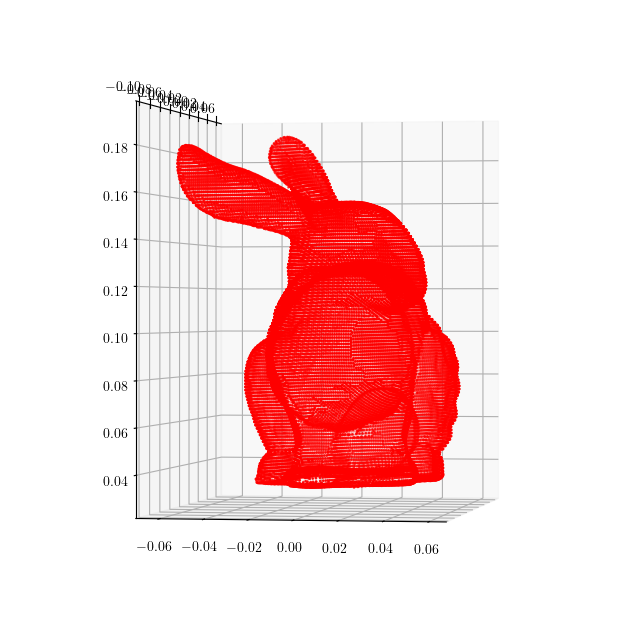

In [2]:
dataset_name = "stanford_bunny"
dataset_config = load_dataset_config(dataset_name)
loader = PointCloudLoader(dataset_config)

dataset = loader.load()
describe_data(dataset)
plot_pointcloud_voronoi(dataset)

## Loading and Applying the Lifting


Transform configuration for pointcloud2hypergraph/voronoi_lifting:

{'transform_type': 'lifting',
 'transform_name': 'VoronoiLifting',
 'support_ratio': 0.005,
 'feature_lifting': 'ProjectionSum'}
Transform parameters are the same, using existing data_dir: /Users/patrykrygiel/Documents/UTWENTE/Projects/challenge-icml-2024/datasets/pointcloud/toy_dataset/stanford_bunny/lifting/470379963

Dataset only contains 1 sample:
 - Hypergraph with 35947 vertices and 180 hyperedges.
 - The nodes have feature dimensions 3.
 - The hyperedges have feature dimensions 3.



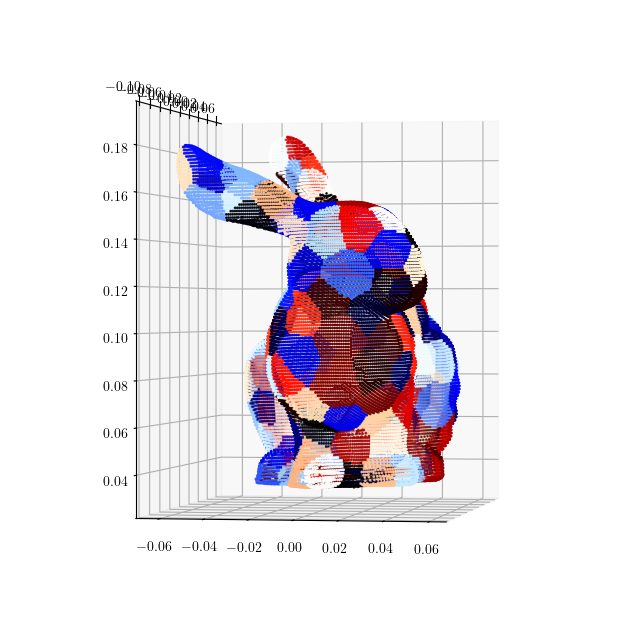

In [3]:
transform_type = "liftings"
transform_id = "pointcloud2hypergraph/voronoi_lifting"
transform_config = {"lifting": load_transform_config(transform_type, transform_id)}

lifted_dataset = PreProcessor(dataset, transform_config, loader.data_dir)
describe_data(lifted_dataset)
plot_pointcloud_voronoi(lifted_dataset)

## Create and Run a Simplicial NN Model
In this section a simple model is created to test that the used lifting works as intended. In this case the model uses the incidence_hyperedges matrix so the lifting should make sure to add it to the data.

In [4]:
from modules.models.hypergraph.unigcn import UniGCNModel

model_type = "hypergraph"
model_id = "unigcn"
model_config = load_model_config(model_type, model_id)

model = UniGCNModel(model_config, dataset_config)


Model configuration for hypergraph UNIGCN:

{'in_channels': None,
 'hidden_channels': 32,
 'out_channels': None,
 'n_layers': 2}


In [5]:
y_hat = model(lifted_dataset.get(0))

If everything is correct the cell above should execute without errors.